### Importing Neccessary Libraries 

In [1]:
import cv2


In [2]:
from tensorflow.keras.utils import to_categorical

C:\Users\Diksha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Diksha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Diksha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Diksha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [3]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

In [6]:
# Setting directory to dataset
os.chdir("C:/Users/Diksha/Desktop/Face_mask_detection")
Dataset="Dataset"
Data_dir=os.listdir(Dataset)
print(Data_dir)

['without_mask', 'with_mask']


In [7]:
img_rows,img_col=112,112
images=[]
labels=[]

for category in Data_dir:
    folder_path = os.path.join(Dataset,category)
    for img in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img)
        img=cv2.imread(img_path)
        
        try:
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized_img=cv2.resize(grayscale_img,(img_rows,img_col))
            images.append(resized_img)
            labels.append(category)
        #exception handling in case of any error
        except Exception as e:
            print('Exception :',e)
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows,img_col,1))

# One Hot Encoding on the labels
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
labels=np.array(labels)

# Spliting the dataset into train and test
(train_X,test_X,train_Y,test_Y)=train_test_split(images,labels,test_size=0.25,random_state=0)

### Building Convolutional Neural Network(CNN) Classification Model

In [8]:
# Importing Neccessary Keras Library
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D

# define model parameter
num_classes=2
batch_size=32

# Build CNN model using sequential API
model=Sequential()

# First layer of model.
model.add(Conv2D(64,(3,3),input_shape=(img_rows,img_col,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second layer of model
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output layer
model.add(Flatten())
model.add(Dropout(0.5))

# softmax_classifier
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 110, 110, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)           

Using TensorFlow backend.


### Training the Classification Model 

In [9]:
from keras.optimizers import Adam
epochs =50
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
fitted_model=model.fit(train_X,train_Y,epochs=epochs,validation_split=0.25)


Train on 774 samples, validate on 258 samples
Epoch 1/50
774/774 [==============================] - 14s 18ms/step - loss: 0.8118 - accuracy: 0.5065 - val_loss: 0.6931 - val_accuracy: 0.4884
Epoch 2/50
774/774 [==============================] - 15s 19ms/step - loss: 0.6844 - accuracy: 0.5620 - val_loss: 0.6385 - val_accuracy: 0.7791
Epoch 3/50
774/774 [==============================] - 15s 19ms/step - loss: 0.5271 - accuracy: 0.7377 - val_loss: 0.3630 - val_accuracy: 0.8605
Epoch 4/50
774/774 [==============================] - 15s 19ms/step - loss: 0.3472 - accuracy: 0.8566 - val_loss: 0.2445 - val_accuracy: 0.9186
Epoch 5/50
774/774 [==============================] - 14s 19ms/step - loss: 0.2323 - accuracy: 0.9121 - val_loss: 0.2019 - val_accuracy: 0.9225
Epoch 6/50
774/774 [==============================] - 14s 19ms/step - loss: 0.1705 - accuracy: 0.9341 - val_loss: 0.1471 - val_accuracy: 0.9457
Epoch 7/50
774/774 [==============================] - 15s 20ms/step - loss: 0.1257 - accu

### Loss and Accuracy Plot

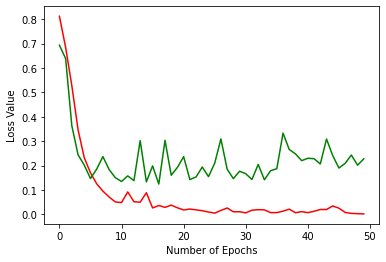

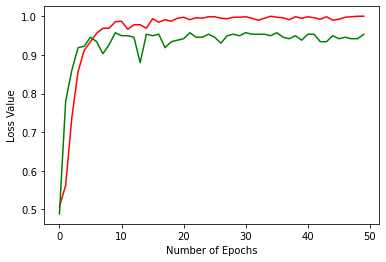

In [10]:
from matplotlib import pyplot as plt
# Plot training and validation loss
plt.plot(fitted_model.history['loss'],'r',label='Training Loss')
plt.plot(fitted_model.history['val_loss'],'g',label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend
plt.show()

# plot Training and Validation accuracy

plt.plot(fitted_model.history['accuracy'],'r',label='Training Accuracy')
plt.plot(fitted_model.history['val_accuracy'],'g',label='Training Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend
plt.show()

### Saving the model

In [11]:
model.save('face_mask_detection_system.h5')

### Opening Webcam For Capturing images

In [12]:
# importing neccessary libraries
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
# Load trained deep Learning Model
model=load_model('face_mask_detection_system.h5')

# classifier to detect face
face_det_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect Video
vid_source=cv2.VideoCapture(0)

text_dict={0:'Mask ON',1:'No Mask'}
rect_color_dict={0:(0,255,0),1:(0,0,255)}


while(True):
    ret,img=vid_source.read()
    #grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    if ret is True:
        grayscale_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        continue
    faces=face_det_classifier.detectMultiScale(grayscale_img,1.3,5)
    
    for(x,y,w,h) in faces:
        face_img=grayscale_img[y:y+w,x:x+w]
        resized_img=cv2.resize(face_img,(112,112))
        normalized_img=resized_img/255.0
        reshaped_img=np.reshape(normalized_img,(1,112,112,1))
        result=model.predict(reshaped_img)
        
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),rect_color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),rect_color_dict[label],-1)
        cv2.putText(img,text_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
       
            
    cv2.imshow('Live Video Feed',img)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
source.release()
cv2.destroyAllWindows()